In [1]:
import petroeval as pet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import numpy as np 
from mpl_toolkits.axes_grid1 import make_axes_locatable

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as sklm 

In [3]:
las = pet.read_lasio('../data/train_wells/ataga 05.las')
test_df = las.df()

In [4]:
test_df.head()

,CALI,DT,GR,ILD,LLS,MSFL,NPHI,RHOB,SP,DEPT_1,...,PHID_ATAGA,PHIDF_ATAGA,VSHF,PHIE_ATAGA,NTG,F_ATAGA,SWIRR_ATAGA,SW_ATAGA,PERM_ATAGA,PERM_EFF_ATAGA
DEPT,,,,,,,,,,,,,,,,,,,,,
4347.5,NaN,NaN,77.943199,NaN,NaN,NaN,NaN,NaN,88.919998,1325.118042,...,NaN,NaN,0.227323,NaN,0.772677,NaN,NaN,NaN,NaN,NaN
4348.0,NaN,NaN,77.943199,NaN,NaN,NaN,NaN,NaN,88.925201,1325.270386,...,NaN,NaN,0.227323,NaN,0.772677,NaN,NaN,NaN,NaN,NaN
4348.5,NaN,NaN,77.943199,NaN,NaN,NaN,NaN,NaN,88.930397,1325.422852,...,NaN,NaN,0.227323,NaN,0.772677,NaN,NaN,NaN,NaN,NaN
4349.0,NaN,NaN,77.943199,NaN,NaN,NaN,NaN,NaN,88.969498,1325.575195,...,NaN,NaN,0.227323,NaN,0.772677,NaN,NaN,NaN,NaN,NaN
4349.5,NaN,NaN,77.943199,-0.0569,NaN,NaN,NaN,NaN,89.614197,1325.727539,...,NaN,NaN,0.227323,NaN,0.772677,NaN,NaN,NaN,NaN,NaN


In [5]:
las.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr=""),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="")],
 'Well': [HeaderItem(mnemonic="STRT", unit="ft", value="4347.5", descr=""),
  HeaderItem(mnemonic="STOP", unit="ft", value="14356.0", descr=""),
  HeaderItem(mnemonic="STEP", unit="ft", value="0.5", descr=""),
  HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr=""),
  HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="ATAGA 5", descr="WELL"),
  HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
  HeaderItem(mnemonic="SRVC", unit="", value="", descr="SERVICE COMPANY"),
  HeaderItem(mnemonic="DATE", unit="", value="2023-11-26 20:43:57   : Log Expo...),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="UWI", unit="", value="ATG05", descr="UNIQUE WELL ID"),
  HeaderItem

In [6]:
test_df.FLUIDTYPES.value_counts()

3.0    13437
2.0     3492
1.0     3068
Name: FLUIDTYPES, dtype: int64

In [7]:
test_df.FLUIDTYPES.value_counts().sum()

19997

In [8]:
test_df.dtypes

CALI               float64
DT                 float64
GR                 float64
ILD                float64
LLS                float64
MSFL               float64
NPHI               float64
RHOB               float64
SP                 float64
DEPT_1             float64
ATAGA_LITHOLOGY    float64
FLUIDTYPES         float64
IGR                float64
VSH                float64
FL                 float64
PHID_ATAGA         float64
PHIDF_ATAGA        float64
VSHF               float64
PHIE_ATAGA         float64
NTG                float64
F_ATAGA            float64
SWIRR_ATAGA        float64
SW_ATAGA           float64
PERM_ATAGA         float64
PERM_EFF_ATAGA     float64
dtype: object

In [9]:
test_df.shape[0] - test_df.FLUIDTYPES.value_counts().sum()

21

In [10]:
test_df.shape[0]

20018

In [11]:
test_df.FLUIDTYPES.value_counts()/test_df.shape[0]

3.0    0.671246
2.0    0.174443
1.0    0.153262
Name: FLUIDTYPES, dtype: float64

In [12]:
test_df.isna().sum()/test_df.shape[0]

CALI               0.695474
DT                 0.869917
GR                 0.000000
ILD                0.051554
LLS                0.960985
MSFL               0.960735
NPHI               0.682086
RHOB               0.669947
SP                 0.050904
DEPT_1             0.000000
ATAGA_LITHOLOGY    0.000000
FLUIDTYPES         0.001049
IGR                0.000000
VSH                0.000000
FL                 0.000000
PHID_ATAGA         0.669947
PHIDF_ATAGA        0.669947
VSHF               0.000000
PHIE_ATAGA         0.669947
NTG                0.000000
F_ATAGA            0.669947
SWIRR_ATAGA        0.669947
SW_ATAGA           0.052802
PERM_ATAGA         0.669947
PERM_EFF_ATAGA     0.669947
dtype: float64

In [13]:
las1 = pet.read_lasio('../data/train_wells/ataga 07.las')
las2 = pet.read_lasio('../data/train_wells/ataga 10.las')
las3 = pet.read_lasio('../data/train_wells/ataga 11.las')
train_df1 = las1.df()
train_df2 = las2.df()
train_df3 = las3.df()

In [14]:
train_df1 = train_df1[["GR", "RHOB", "ILD", "SP", "NPHI", "FLUIDTYPES"]]
train_df2 = train_df2[["GR", "RHOB", "ILD", "SP", "NPHI", "FLUIDTYPES"]]
train_df3 = train_df3[["GR", "RHOB", "ILD", "SP", "NPHI", "FLUIDTYPES"]]

In [15]:
train_df = pd.concat((train_df1, train_df2, train_df3))
train_df.shape

(61997, 6)

In [16]:
train_df.dtypes

GR            float64
RHOB          float64
ILD           float64
SP            float64
NPHI          float64
FLUIDTYPES    float64
dtype: object

In [17]:
train_df.shape

(61997, 6)

In [18]:
train_df.isna().sum()/train_df.shape[0]

GR            0.350275
RHOB          0.512299
ILD           0.328887
SP            0.059084
NPHI          0.547817
FLUIDTYPES    0.149588
dtype: float64

In [19]:
train_df.dropna(subset=['FLUIDTYPES'], inplace = True)

In [20]:
train_df.fillna(-999, inplace=True)

In [21]:
train_df.isna().sum()/train_df.shape[0]

GR            0.0
RHOB          0.0
ILD           0.0
SP            0.0
NPHI          0.0
FLUIDTYPES    0.0
dtype: float64

In [22]:
train_df.dtypes

GR            float64
RHOB          float64
ILD           float64
SP            float64
NPHI          float64
FLUIDTYPES    float64
dtype: object

In [23]:
labels = train_df.FLUIDTYPES
features = train_df.drop('FLUIDTYPES', axis = 1)

In [24]:
model_2 = xgb.XGBClassifier(n_estimators =1000, max_depth = 6)

In [25]:
model = RandomForestClassifier(n_estimators=100, verbose=2)
model.fit(features, labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished


RandomForestClassifier(verbose=2)

In [26]:
model_2.fit(features, labels)

[12:13:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
test_df.FLUIDTYPES.value_counts()

3.0    13437
2.0     3492
1.0     3068
Name: FLUIDTYPES, dtype: int64

In [28]:
test_df.FLUIDTYPES.fillna(3, inplace = True)

In [29]:
test_df.FLUIDTYPES.isna().sum()

0

In [30]:
test_df.FLUIDTYPES.value_counts()

3.0    13458
2.0     3492
1.0     3068
Name: FLUIDTYPES, dtype: int64

In [31]:
test_labels = test_df.FLUIDTYPES.values

In [32]:
test_df.shape

(20018, 25)

In [33]:
test_df.isna().sum()/test_df.shape[0]

CALI               0.695474
DT                 0.869917
GR                 0.000000
ILD                0.051554
LLS                0.960985
MSFL               0.960735
NPHI               0.682086
RHOB               0.669947
SP                 0.050904
DEPT_1             0.000000
ATAGA_LITHOLOGY    0.000000
FLUIDTYPES         0.000000
IGR                0.000000
VSH                0.000000
FL                 0.000000
PHID_ATAGA         0.669947
PHIDF_ATAGA        0.669947
VSHF               0.000000
PHIE_ATAGA         0.669947
NTG                0.000000
F_ATAGA            0.669947
SWIRR_ATAGA        0.669947
SW_ATAGA           0.052802
PERM_ATAGA         0.669947
PERM_EFF_ATAGA     0.669947
dtype: float64

In [34]:
test_df = test_df.fillna(-999)

In [35]:
train_df.columns

Index(['GR', 'RHOB', 'ILD', 'SP', 'NPHI', 'FLUIDTYPES'], dtype='object')

In [36]:
test_df = test_df[['GR', 'RHOB', 'ILD', 'SP', 'NPHI']]

In [37]:
test_df.dtypes

GR      float64
RHOB    float64
ILD     float64
SP      float64
NPHI    float64
dtype: object

In [38]:
pred = model.predict(test_df)
pred_1 = model_2.predict(test_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [39]:
def evaluate_predictions(actual, pred):
    print(f'The accuracy of this model is: {sklm.accuracy_score(actual, pred)}')
    print(f"The precision of this model is: {sklm.precision_score(actual, pred, average='weighted')}")
    print(f"The recall evaluation of this model is: {sklm.recall_score(actual, pred, average='weighted')}")
    print(f"The f1_score of this model is: {sklm.f1_score(actual, pred, average='weighted')}")

In [40]:
test_labels.dtype

dtype('float64')

In [41]:
pred.dtype

dtype('float64')

In [42]:
evaluate_predictions(test_labels, pred)

The accuracy of this model is: 0.9629833150164852
The precision of this model is: 0.9639006483429756
The recall evaluation of this model is: 0.9629833150164852
The f1_score of this model is: 0.9624776207910019


In [43]:
evaluate_predictions(test_labels.ravel(), pred)

The accuracy of this model is: 0.9629833150164852
The precision of this model is: 0.9639006483429756
The recall evaluation of this model is: 0.9629833150164852
The f1_score of this model is: 0.9624776207910019


In [44]:
evaluate_predictions(test_labels, pred_1)

The accuracy of this model is: 0.9598361474672794
The precision of this model is: 0.962639478748805
The recall evaluation of this model is: 0.9598361474672794
The f1_score of this model is: 0.9594123120086653


In [45]:
test_df.columns

Index(['GR', 'RHOB', 'ILD', 'SP', 'NPHI'], dtype='object')

In [46]:
test_df["Predicted_Fluid"] = pred
test_df["FLUIDTYPES"] = test_labels

In [47]:
test_df.columns

Index(['GR', 'RHOB', 'ILD', 'SP', 'NPHI', 'Predicted_Fluid', 'FLUIDTYPES'], dtype='object')

In [48]:
test_df

,GR,RHOB,ILD,SP,NPHI,Predicted_Fluid,FLUIDTYPES
DEPT,,,,,,,
4347.5,77.943199,-999.0,-999.0000,88.919998,-999.0,3.0,3.0
4348.0,77.943199,-999.0,-999.0000,88.925201,-999.0,3.0,3.0
4348.5,77.943199,-999.0,-999.0000,88.930397,-999.0,3.0,3.0
4349.0,77.943199,-999.0,-999.0000,88.969498,-999.0,3.0,3.0
4349.5,77.943199,-999.0,-0.0569,89.614197,-999.0,3.0,3.0
...,...,...,...,...,...,...,...
14354.0,77.040001,-999.0,11.0400,-25.639999,-999.0,3.0,3.0
14354.5,77.460602,-999.0,11.9417,-25.268600,-999.0,3.0,3.0
14355.0,77.619904,-999.0,12.3800,-24.909599,-999.0,3.0,3.0


In [49]:
def make_facies_log_plot(logs, x1, x2, x3, x4, x5, Depth=False):

    logs = logs.fillna(0)
    if Depth == False:
        logs['Depth'] = logs.index
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    else:
        logs['Depth'] = logs[Depth]
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
        
    logs = logs.sort_values(by='Depth', ascending=True)

    facies_colors = [
        '#196F3D', '#FF0000', '#00FFFF', '#000000'
    ]

    facies_labels = [
        'Gas', 'Oil', 'Water', 'Undifferentiated'
    ]

    facies_colormap = {}
    for ind, label in enumerate(facies_labels):
        facies_colormap[label] = facies_colors[ind]

    no = 4
    #no = len(list(dict(logs[target].value_counts())))
    cmap_facies = colors.ListedColormap(
            facies_colors[0 : no], 'indexed'
            )

    cluster=np.repeat(np.expand_dims(logs['FLUIDTYPES'].values,1), 100, 1)
    cluster1=np.repeat(np.expand_dims(logs['Predicted_Fluid'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 12))
    ax[0].plot(logs[x1], logs.Depth, '-g')
    ax[1].plot(logs[x2], logs.Depth, '-')
    ax[2].plot(logs[x3], logs.Depth, '-', color='0.5')
    ax[3].plot(logs[x4], logs.Depth, '-', color='r')
    ax[4].plot(logs[x5], logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=4)
    im1=ax[6].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=4)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((50*' ').join([
        'Gas', 'Oil', 'Water', 'Undifferentiated'
    ]))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    cbar1=plt.colorbar(im1, cax=cax)
    cbar1.set_label((50*' ').join([
        'Gas', 'Oil', 'Water', 'Undifferentiated'
    ]))
    cbar1.set_ticks(range(0,1)); cbar1.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel(x1)
    ax[0].set_xlim(0, logs[x1].max())
    ax[0].set_ylabel("Depth (ft)")
    ax[1].set_xlabel(x2)
    ax[1].set_xlim(1.8, logs[x2].max())
    ax[2].set_xlabel(x3)
    ax[2].set_xlim(0, logs[x3].max())
    ax[3].set_xlabel(x4)
    ax[3].set_xlim(0, logs[x4].max())
    ax[4].set_xlabel(x5)
    ax[4].set_xscale('log')
    ax[4].set_xlim(logs[x5].min(), logs[x5].max())
    ax[5].set_xlabel('Actual Fluid')
    ax[6].set_xlabel('Predicted Fluid')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([]), ax[6].set_xticklabels([])
    f.suptitle('Well: ATAGA 5', fontsize=14,y=0.94)


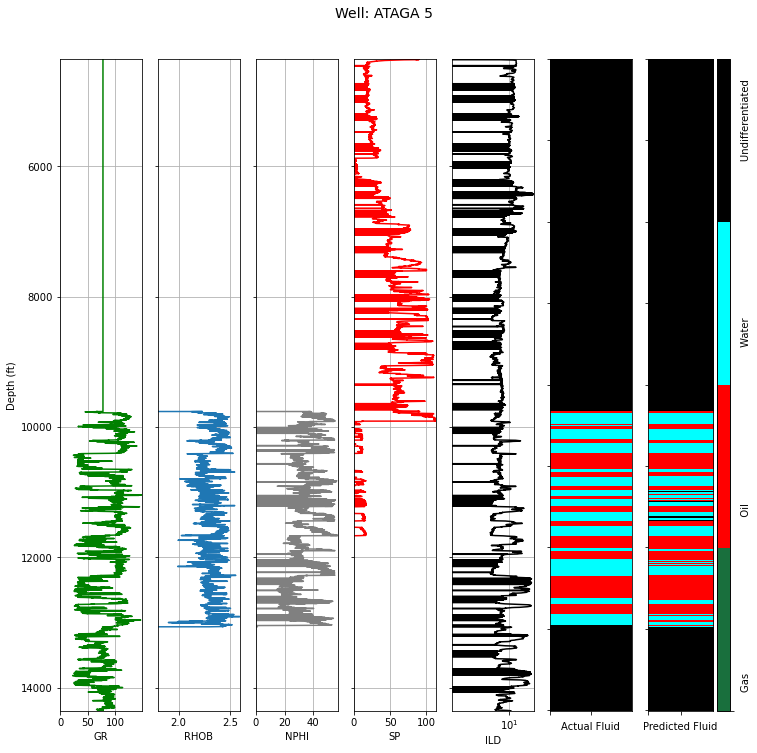

In [50]:
make_facies_log_plot(test_df, "GR", "RHOB", "NPHI", "SP", "ILD")

In [51]:
test_df.FLUIDTYPES.value_counts()/test_df.shape[0]

3.0    0.672295
2.0    0.174443
1.0    0.153262
Name: FLUIDTYPES, dtype: float64

In [78]:
test_df.Predicted_Fluid.value_counts()/test_df.shape[0]

3.0    0.679538
1.0    0.167449
2.0    0.153012
Name: Predicted_Fluid, dtype: float64

In [79]:
test_df.to_csv('../data/results/ataga_05_predicted_xgb.csv', index=False)

In [81]:
test_df = pd.read_csv("../data/results/ataga_05_predicted_xgb.csv")

In [82]:
test_df

,GR,RHOB,ILD,SP,NPHI,Predicted_Fluid,FLUIDTYPES
0,77.943199,-999.0,-999.0000,88.919998,-999.0,3.0,3.0
1,77.943199,-999.0,-999.0000,88.925201,-999.0,3.0,3.0
2,77.943199,-999.0,-999.0000,88.930397,-999.0,3.0,3.0
3,77.943199,-999.0,-999.0000,88.969498,-999.0,3.0,3.0
4,77.943199,-999.0,-0.0569,89.614197,-999.0,3.0,3.0
...,...,...,...,...,...,...,...
20013,77.040001,-999.0,11.0400,-25.639999,-999.0,3.0,3.0
20014,77.460602,-999.0,11.9417,-25.268600,-999.0,3.0,3.0
20015,77.619904,-999.0,12.3800,-24.909599,-999.0,3.0,3.0
20016,77.570000,-999.0,12.4000,-24.680000,-999.0,3.0,3.0


0 = Gas
1 = Oil
2 = Water
3 = Undifferentiated zone